# Clustering
Most of the models we have used in this class have been supervised, meaning we know what ground truth is so we can verify predictions.  Unsupervised will not typically have ground truth so there is no way to verify if they are correct, LocalOutlierFactor was an unsupervised tool that we used early in the class. Cluster analysis is an unsupervised algorithm that attempts to detect groupings or patterns in a data set.  Each algorithm will define what a "group" is differently so it important not to over analyze the results of clustering.  In addition these models are very sensitive to tuning, data initialization, and are often very slow to run.

So why would we use such an unreliable technique?  Clustering can be used for feature engineering, since we are simply generating labels (categorical nominal values) we can then use a conversion technique to make it usable by our model.  We can also use the grouping results for EDA, perhaps the algorithm will find groups or patterns that we could not detect otherwise.  One thing that can help us here is knowledge of our data, for example if we're working on a classification problem with 10 output classes we can ask a cluster model to group our input data into 10 clusters and see if anything interesting comes out.

In this example from sklearn, a data set is represented on each row, each column is a different cluster algorithm, the colors represent groups that the models found.  Notice how much they differ on the same data!

<img src="images\cluster_comparison_001.png" width=600/>

## kMeans
The kmeans algorithm clusters data by separating samples into groups of equal variance (similar to OLS), the distance from each point and a nearby cluster is minimized.  There are two forms of kmeans, MiniBatchKMeans is a faster but slightly less accurate version of the algorithm.  Note that when we call fit we do not specify ground truth, we don't have any!  Just like with LocalOutlierFactor when we call fit we only specify an 'X', but this could include the output, or only include some inputs.  Once we fit the model there is really only two things we can get.

* cluster\_centers\_ - center for each cluster
* labels\_ - label for each sample


c:\Users\rhbyr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


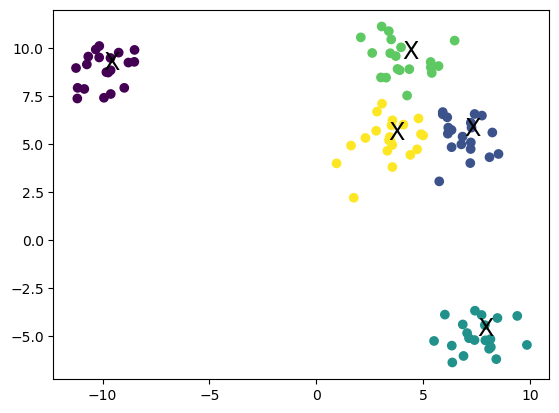

[4 3 4 4 1 4 2 3 1 0 0 0 1 4 1 0 3 4 3 0 4 2 0 4 4 2 4 4 1 2 3 2 1 1 2 2 2
 3 1 0 0 2 4 3 4 0 3 2 2 0 0 1 1 3 3 1 1 3 4 1 0 3 4 4 1 3 0 0 2 4 2 3 1 2
 2 2 0 2 3 1 2 1 3 4 1 0 1 1 4 3 0 4 2 0 3 3 0 2 0 4]


In [16]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

X, y = make_blobs(n_samples=100, centers=5)

model = KMeans(n_clusters=5)
model.fit(X)

for center in model.cluster_centers_:
    plt.text(s='X', x=center[0], y=center[1], color='k', size='xx-large')

x, y = X[:,0], X[:, 1]
plt.scatter(x, y, c=model.labels_)
plt.show()

print(model.labels_)

## Affinity Propagation
Affinity propagation creates clusters by determining which sample is most representative of other nearby samples, this representative is known as an exemplar.  This algorithm is different from kmeans as it determines the number of clusters by itself, however this algorithm is much more complex than kmeans.  Try increasing the number of samples with make_blobs to see how the runtime increases (don't increase by too much...).

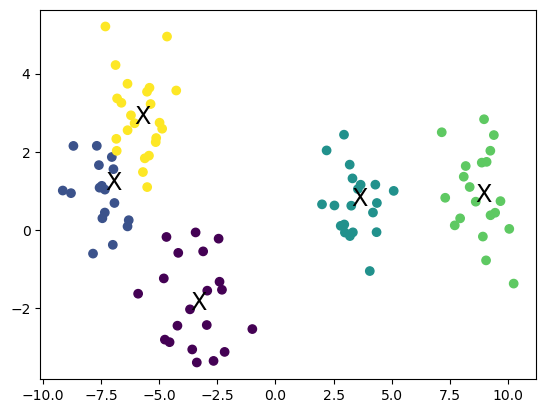

In [3]:
from sklearn.cluster import AffinityPropagation
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

import numpy as np

X, y = make_blobs(n_samples=100, centers=5)

model = AffinityPropagation()
model.fit(X)

for center in model.cluster_centers_:
    plt.text(s='X', x=center[0], y=center[1], color='k', size='xx-large')

x, y = X[:,0], X[:, 1]
plt.scatter(x, y, c=model.labels_)
plt.show()

## Mean Shift
The mean shift algorithm discovers blobs by area of maximum density, basically you supply a search region and samples within that region are considered part of a group.  Try changing the bandwidth below to smaller and larger values to see what happens.

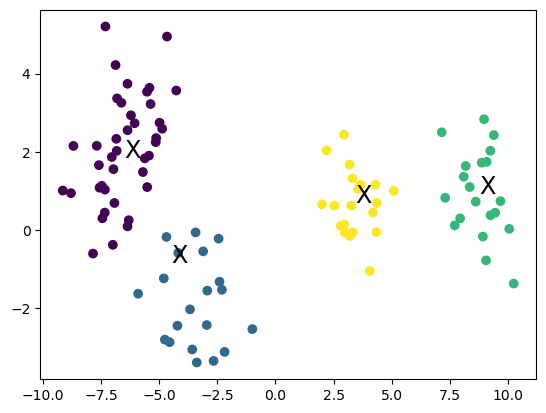

[0 2 0 1 0 0 3 0 2 3 0 2 3 2 2 3 0 3 3 2 0 2 1 2 1 1 0 0 1 0 0 3 3 0 3 1 1
 2 1 1 0 2 1 0 2 0 1 1 3 0 0 3 2 0 1 1 0 0 0 0 3 3 3 0 1 2 0 0 2 0 3 0 0 2
 0 0 3 0 2 3 0 3 0 2 1 3 1 2 0 1 2 0 0 0 0 1 3 1 0 2]


In [13]:
from sklearn.cluster import MeanShift
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

# X, y = make_blobs(n_samples=100, centers=5)

model = MeanShift(bandwidth=3)
model.fit(X)

for center in model.cluster_centers_:
    plt.text(s='X', x=center[0], y=center[1], color='k', size='xx-large')

x, y = X[:,0], X[:, 1]
plt.scatter(x, y, c=model.labels_)
plt.show()

print(model.labels_)

# OK
Now we've further explored the difference between supervised and unsupervised learning.  Clustering algorithms can be a challenge to use since it is difficult to veryify the output, however having more tools at our disposal is never a bad thing.  We did not go over every clustering algorithm, but again notice how each one that we did gave very different results on the same data set.